<a href="https://colab.research.google.com/github/talgalper/Honours-2021/blob/main/plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
import matplotlib.pyplot as plt
import numpy as np

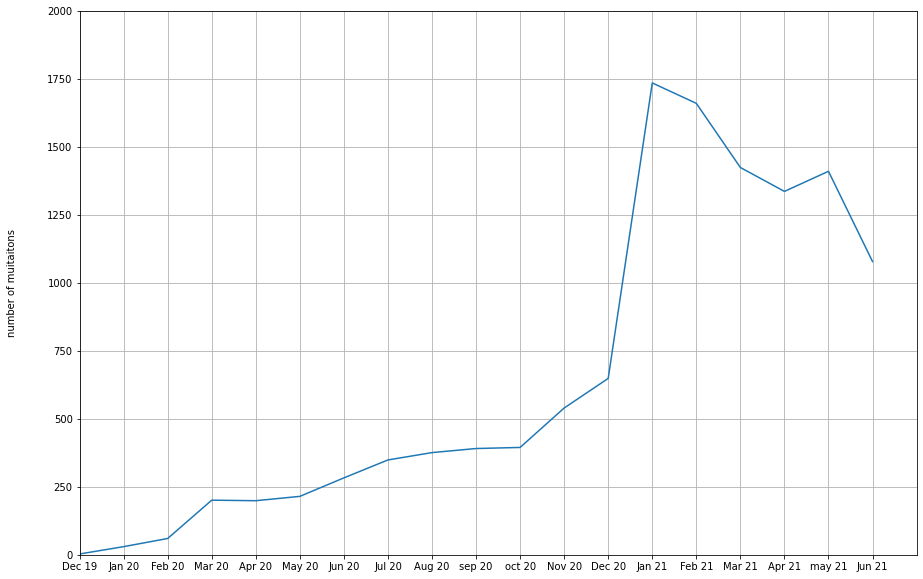

In [61]:
# Data for plotting
x = np.array([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18])
y1 = np.array([67,185,2944,12482,20058,21797,18215,17443,38602,39107,59771,80987,140851,307232,388230,473636,361614,206664,])
y2 = np.array([#monthly cases])
x_axis_labels = ['Dec 19','Jan 20','Feb 20','Mar 20','Apr 20','May 20','Jun 20','Jul 20','Aug 20','sep 20','oct 20','Nov 20','Dec 20','Jan 21','Feb 21','Mar 21','Apr 21','may 21','Jun 21']

#set figure size
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(10)

#plot parameters
plt.xticks(x, x_axis_labels)
plt.plot(x, y1, y2)
plt.xlim([0,19])
plt.ylim([0,2000])
plt.grid()
plt.ylabel('recorded cases vs genomes sequenced',labelpad=30)

plt.savefig('SAVE_FILENAME')
plt.show()
